In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic_train = pd.read_csv(r'C:/Users/ELCOT/Desktop/LU ass/Day_24 materials/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Performe EDA on dataset

fillna values or dropna
Converting non-numerical into Numerical

In [3]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(titanic_train.Sex)

In [6]:
X_data = pd.DataFrame([encoded_sex,titanic_train.Age,titanic_train.Fare]).T
y_data = titanic_train.Survived

In [7]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X=X_data,y=y_data);

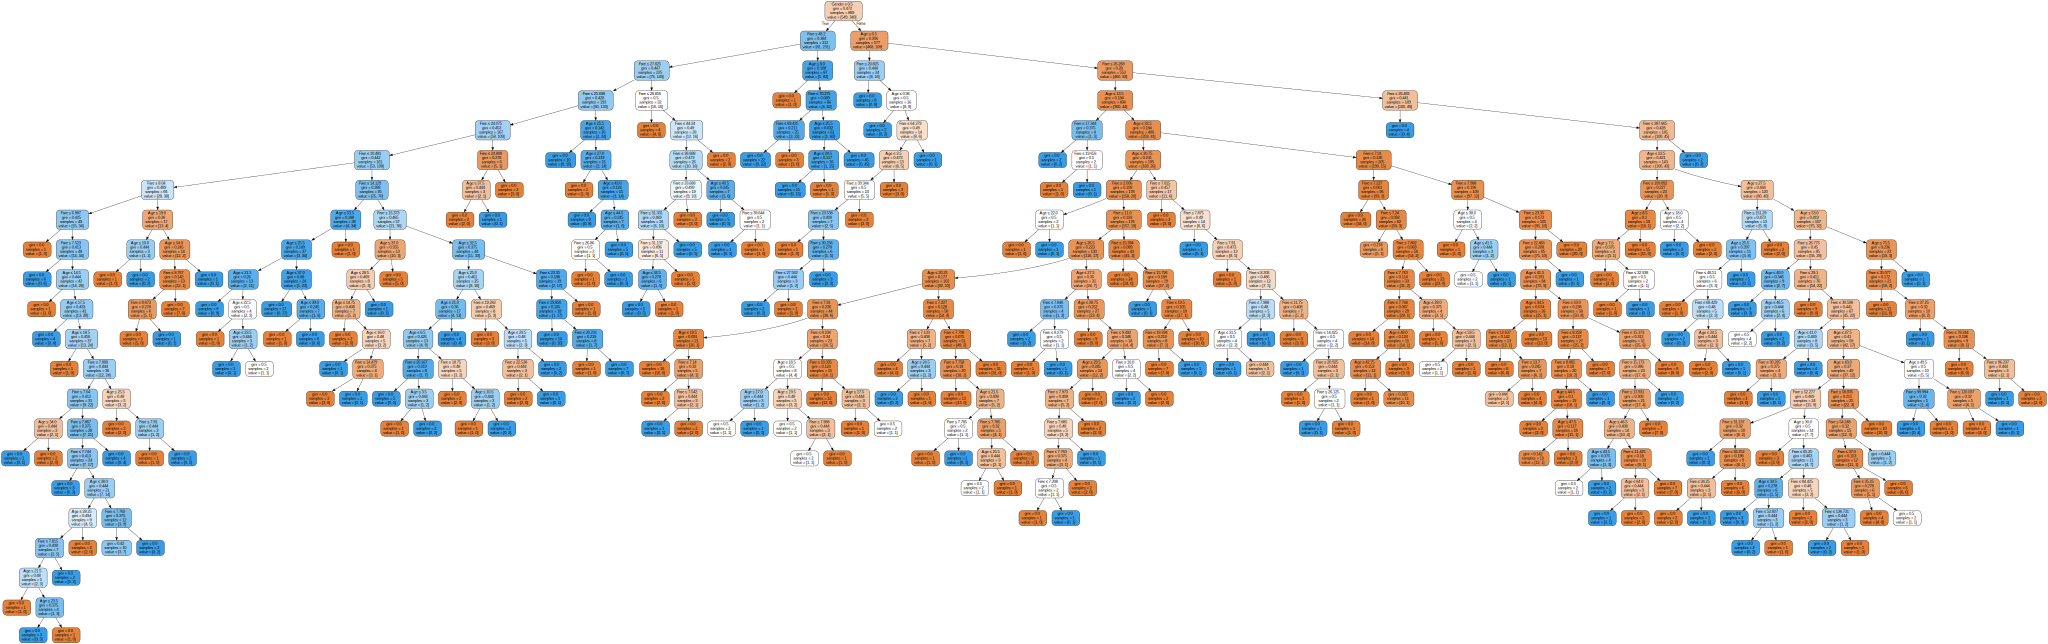

In [23]:
from sklearn import tree
from IPython.display import display,SVG
import graphviz
data = tree.export_graphviz(tree_model,feature_names=['Gender','Age',"Fare"],
                            out_file=None,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph
display(SVG(graph.pipe(format='svg')))

In [11]:
tree_model.score(X_data,y_data)

0.9763779527559056

In [14]:

# Predincting with test data set

test_data = pd.read_csv(r'C:/Users/ELCOT/Desktop/LU ass/Day_24 materials/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [15]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [16]:
test_data["Sex"] = encoder.fit_transform(test_data["Sex"])

In [17]:
preds = ['Sex','Age','Fare']
y_preds = tree_model.predict(test_data[preds])
y_preds[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [20]:
pd.DataFrame({'PassengerID':test_data['PassengerId'],'Survived':y_preds}).head(5)

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
